# EDA (descriptions des variables, analyses univariées, bivariées) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/4054a881-9509-4cc0-9501-1174d5bbf6fc.csv')
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
data2=data.copy()

In [4]:
data2.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data2.shape

(16512, 10)

In [6]:
data2.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
data.dtypes.value_counts()

float64    9
object     1
int64      1
dtype: int64

<AxesSubplot:ylabel='None'>

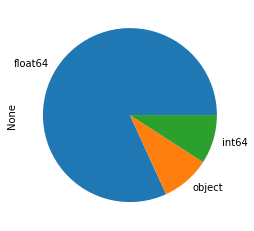

In [8]:
data.dtypes.value_counts().plot.pie()

# nettoyage de la basse de données

# 1 les valeurs manquantes

In [9]:
# Trying to sum all the missing values with isnull().sum()
data2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

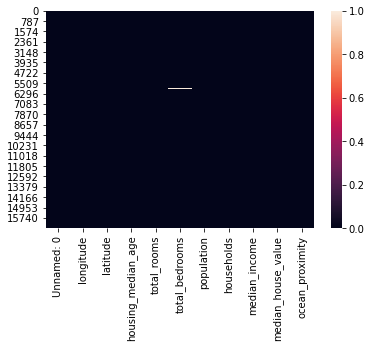

In [10]:
sns.heatmap(data.isna())

In [11]:
#on peux regarder qu'onà 176 valeurs manquantes c'est pas beaucoup parrapport la quantité des donnés qu'on a

In [12]:
# Remplacer en utilisant la médiane
median = data2['total_bedrooms'].median()
data2['total_bedrooms'].fillna(median, inplace=True)

# 2 les valeurs dupliqués

In [13]:
#trouver les valeurs manquantes
data2.duplicated().sum()

0

# 3 la valeurs abbérantes(outliers)

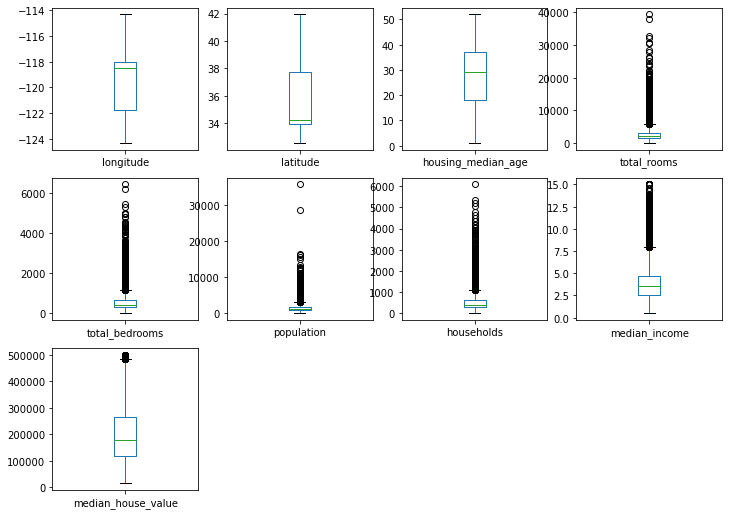

In [14]:
columns = list(data.columns)
data2.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

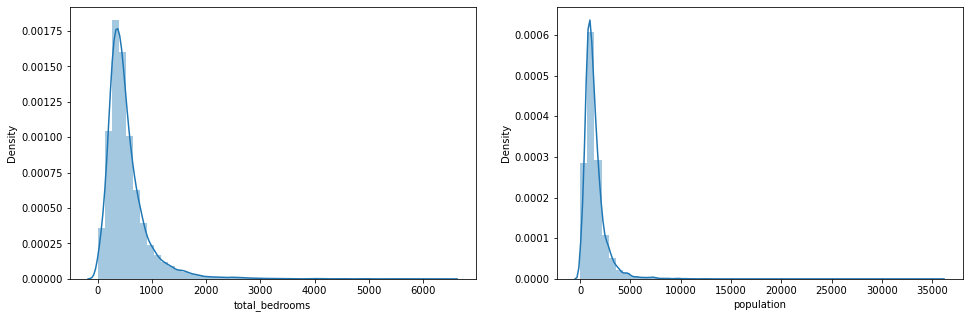

In [15]:
#Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data2['total_bedrooms'])
plt.subplot(1,2,2)
sns.distplot(data2['population'])
plt.show()

In [16]:
#Finding the Boundary Values
print("Highest allowed",data2['population'].mean() + 3*data2['population'].std())
print("Lowest allowed",data2['population'].mean() - 3*data2['population'].std())

Highest allowed 4909.47316245515
Lowest allowed -2039.438642106312


In [17]:
# Finding the Outliers
data2[(data2['population'] > 4909.47) | (data2['population'] < -2039.43)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20,-117.85,34.11,25.0,9255.0,1659.0,4944.0,1627.0,4.5708,223000.0,INLAND
29,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,81300.0,INLAND
57,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,500001.0,NEAR OCEAN
137,-122.07,37.57,8.0,8647.0,1407.0,5019.0,1379.0,6.5615,318300.0,NEAR BAY
154,-122.47,37.65,27.0,8103.0,1655.0,5023.0,1605.0,4.6452,236200.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
16101,-118.33,33.91,8.0,10731.0,3335.0,7211.0,3028.0,2.4550,192700.0,<1H OCEAN
16129,-122.10,37.63,18.0,9963.0,2031.0,5613.0,1946.0,3.8171,187200.0,NEAR BAY
16321,-118.40,34.28,16.0,6573.0,1480.0,6161.0,1473.0,3.3304,154900.0,<1H OCEAN
16337,-117.22,33.90,8.0,8302.0,1461.0,5155.0,1370.0,4.0467,121500.0,INLAND


In [18]:
#Trimming of Outliers
new_df = data2[(data2['population'] > 4909.47) | (data2['population'] < -2039.43)]
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20,-117.85,34.11,25.0,9255.0,1659.0,4944.0,1627.0,4.5708,223000.0,INLAND
29,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,81300.0,INLAND
57,-118.42,33.75,22.0,17591.0,2604.0,6897.0,2492.0,8.2831,500001.0,NEAR OCEAN
137,-122.07,37.57,8.0,8647.0,1407.0,5019.0,1379.0,6.5615,318300.0,NEAR BAY
154,-122.47,37.65,27.0,8103.0,1655.0,5023.0,1605.0,4.6452,236200.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
16101,-118.33,33.91,8.0,10731.0,3335.0,7211.0,3028.0,2.4550,192700.0,<1H OCEAN
16129,-122.10,37.63,18.0,9963.0,2031.0,5613.0,1946.0,3.8171,187200.0,NEAR BAY
16321,-118.40,34.28,16.0,6573.0,1480.0,6161.0,1473.0,3.3304,154900.0,<1H OCEAN
16337,-117.22,33.90,8.0,8302.0,1461.0,5155.0,1370.0,4.0467,121500.0,INLAND


In [19]:
#Capping on Outliers
upper_limit = data2['population'].mean() + 3*data2['population'].std()
lower_limit = data2['population'].mean() - 3*data2['population'].std()

In [20]:
#Now, apply the Capping
data2['population'] = np.where(
    data2['population']>upper_limit,
    upper_limit,
    np.where(
        data2['population']<lower_limit,
        lower_limit,
        data2['population']
    )
)

In [21]:
data2['population'].describe()

count    16512.000000
mean      1399.740372
std        935.268627
min          3.000000
25%        788.000000
50%       1168.000000
75%       1738.000000
max       4909.473162
Name: population, dtype: float64

In [22]:
data['population'].describe()

count    16512.000000
mean      1435.017260
std       1158.151967
min          3.000000
25%        788.000000
50%       1168.000000
75%       1738.000000
max      35682.000000
Name: population, dtype: float64

In [23]:
#aprés le traitement des outliers on peux remarqué que il y'a une petite différence et que ces valeurs abérantes n'auront aucun 
#effet sur nos modéles

# diviser notre data set entre le Xtrain et Xtest

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# We need to split our dataframe, because we want one train_df (70% of data) and one test_df (30% of data)
train_df, test_df = train_test_split(data2, train_size=0.7, test_size=0.3)

In [33]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8739,-117.68,34.15,4.0,4082.0,578.0,1996.0,580.0,6.7813,286300.0,INLAND
6312,-120.79,37.53,20.0,1417.0,263.0,853.0,263.0,3.3083,108300.0,INLAND
8166,-122.66,38.20,39.0,2889.0,517.0,1351.0,489.0,4.3056,251300.0,<1H OCEAN
9458,-122.06,37.60,17.0,5159.0,832.0,3174.0,817.0,5.8704,234400.0,NEAR BAY
12629,-117.94,33.66,16.0,2095.0,450.0,963.0,411.0,5.5000,224100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15470,-118.01,33.74,25.0,8110.0,1264.0,3613.0,1232.0,6.0609,264900.0,<1H OCEAN
10183,-121.43,38.64,34.0,2010.0,411.0,1501.0,422.0,2.0417,65900.0,INLAND
8551,-121.59,39.39,22.0,2515.0,482.0,1284.0,462.0,2.1776,73800.0,INLAND
8066,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,INLAND


# pre-processing

# 1 encodage

In [25]:
#on va utliser la methode OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


In [26]:
## load dataset
#train_df.columns

In [27]:
le = preprocessing.LabelEncoder()
enc = preprocessing.OneHotEncoder()
train_df["ocean_proximity"] =le.fit_transform(train_df["ocean_proximity"])
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5298,-121.26,38.27,20.0,1314.0,229.0,712.000000,219.0,4.4125,144600.0,1
14649,-117.89,33.73,33.0,1308.0,375.0,2175.000000,347.0,3.0824,177400.0,0
11744,-121.91,37.69,23.0,2179.0,308.0,926.000000,299.0,5.9345,259600.0,0
1555,-121.36,38.67,17.0,2770.0,684.0,1471.000000,624.0,2.3683,82500.0,1
4658,-121.32,36.43,22.0,2927.0,637.0,2546.000000,618.0,2.7153,114300.0,0
...,...,...,...,...,...,...,...,...,...,...
3871,-117.87,34.02,16.0,3552.0,575.0,2120.000000,573.0,6.4333,271500.0,0
15994,-121.88,36.58,29.0,4910.0,871.0,3438.000000,904.0,4.0432,450000.0,4
6981,-118.62,34.22,34.0,2633.0,471.0,1313.000000,428.0,4.0909,232900.0,0
15531,-117.98,34.10,22.0,5661.0,1209.0,4909.473162,1178.0,3.7727,159700.0,1


# 1 standardiser la partie train_df

In [39]:
from sklearn.preprocessing import StandardScaler
# We know that there is a problem with the scale of our features. We will use sklearn to do that.

# First, we define StandardScaler()
scaler = StandardScaler()

# Then, we scale our data, selecting only the column that we want to scale.
scaled_df = scaler.fit_transform(train_df.iloc[:, 2:9].to_numpy())

# Finaly, we create a dataframe to store these values.
scaled_df = pd.DataFrame(scaled_df, columns=['housing_median_age','total_rooms',
                                             'total_bedrooms','population',
                                             'households','median_income','median_house_value'])
 
print("Scaled Dataset Using StandardScaler")
scaled_df
test_scaled_df = pd.DataFrame(scaler.transform(test_df.iloc[:, 2:9].to_numpy()),columns=scaled_df.columns)

Scaled Dataset Using StandardScaler


In [40]:
test_scaled_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.945885,0.643383,0.095121,0.637892,0.206080,1.554603,0.687440
1,-0.678598,-0.548359,-0.646003,-0.584371,-0.613430,-0.293435,-0.855528
2,0.826305,0.109894,-0.048398,-0.051837,-0.029174,0.237244,0.384047
3,-0.916215,1.124999,0.692725,1.897582,0.818773,1.069899,0.237552
4,-0.995420,-0.245169,-0.206034,-0.466743,-0.230819,0.872803,0.148268
...,...,...,...,...,...,...,...
4949,-0.282571,2.444636,1.709123,2.367025,1.891633,1.171267,0.501937
4950,0.430278,-0.283179,-0.297792,0.108565,-0.202382,-0.967413,-1.223066
4951,-0.520187,-0.057352,-0.130745,-0.123483,-0.098974,-0.895099,-1.154586
4952,1.697565,-0.836792,-0.808344,-0.848500,-0.861609,-0.872218,-1.281144


In [42]:
# We need to add the new scaled data to the ocean_proximity
scaled_df['ocean_proximity'] = train_df['ocean_proximity']

# Then we will add the longitude and latitude

scaled_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.678598,-0.594419,-0.725997,-0.735149,-0.727178,0.294127,-0.540866,1.0
1,0.351072,-0.597102,-0.382492,0.829305,-0.396272,-0.413640,-0.256544,NaN
2,-0.440982,-0.207605,-0.540128,-0.506309,-0.520362,1.104007,0.455995,1.0
3,-0.916215,0.056680,0.344515,0.076485,0.319829,-0.793624,-1.079171,NaN
4,-0.520187,0.126887,0.233934,1.226032,0.304318,-0.608980,-0.803518,1.0
...,...,...,...,...,...,...,...,...
11553,-0.995420,0.406377,0.088062,0.770491,0.187984,1.369426,0.559148,0.0
11554,0.034251,1.013651,0.784483,2.179889,1.043686,0.097617,2.106450,1.0
11555,0.430278,-0.004584,-0.156626,-0.092472,-0.186871,0.122999,0.224550,NaN
11556,-0.520187,1.349485,1.579721,3.753404,1.752032,-0.046321,-0.409974,1.0


In [43]:
scaled_df ['ocean_proximity'] = scaled_df ['ocean_proximity']. fillna (0)

In [44]:
scaled_df.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity       float64
dtype: object

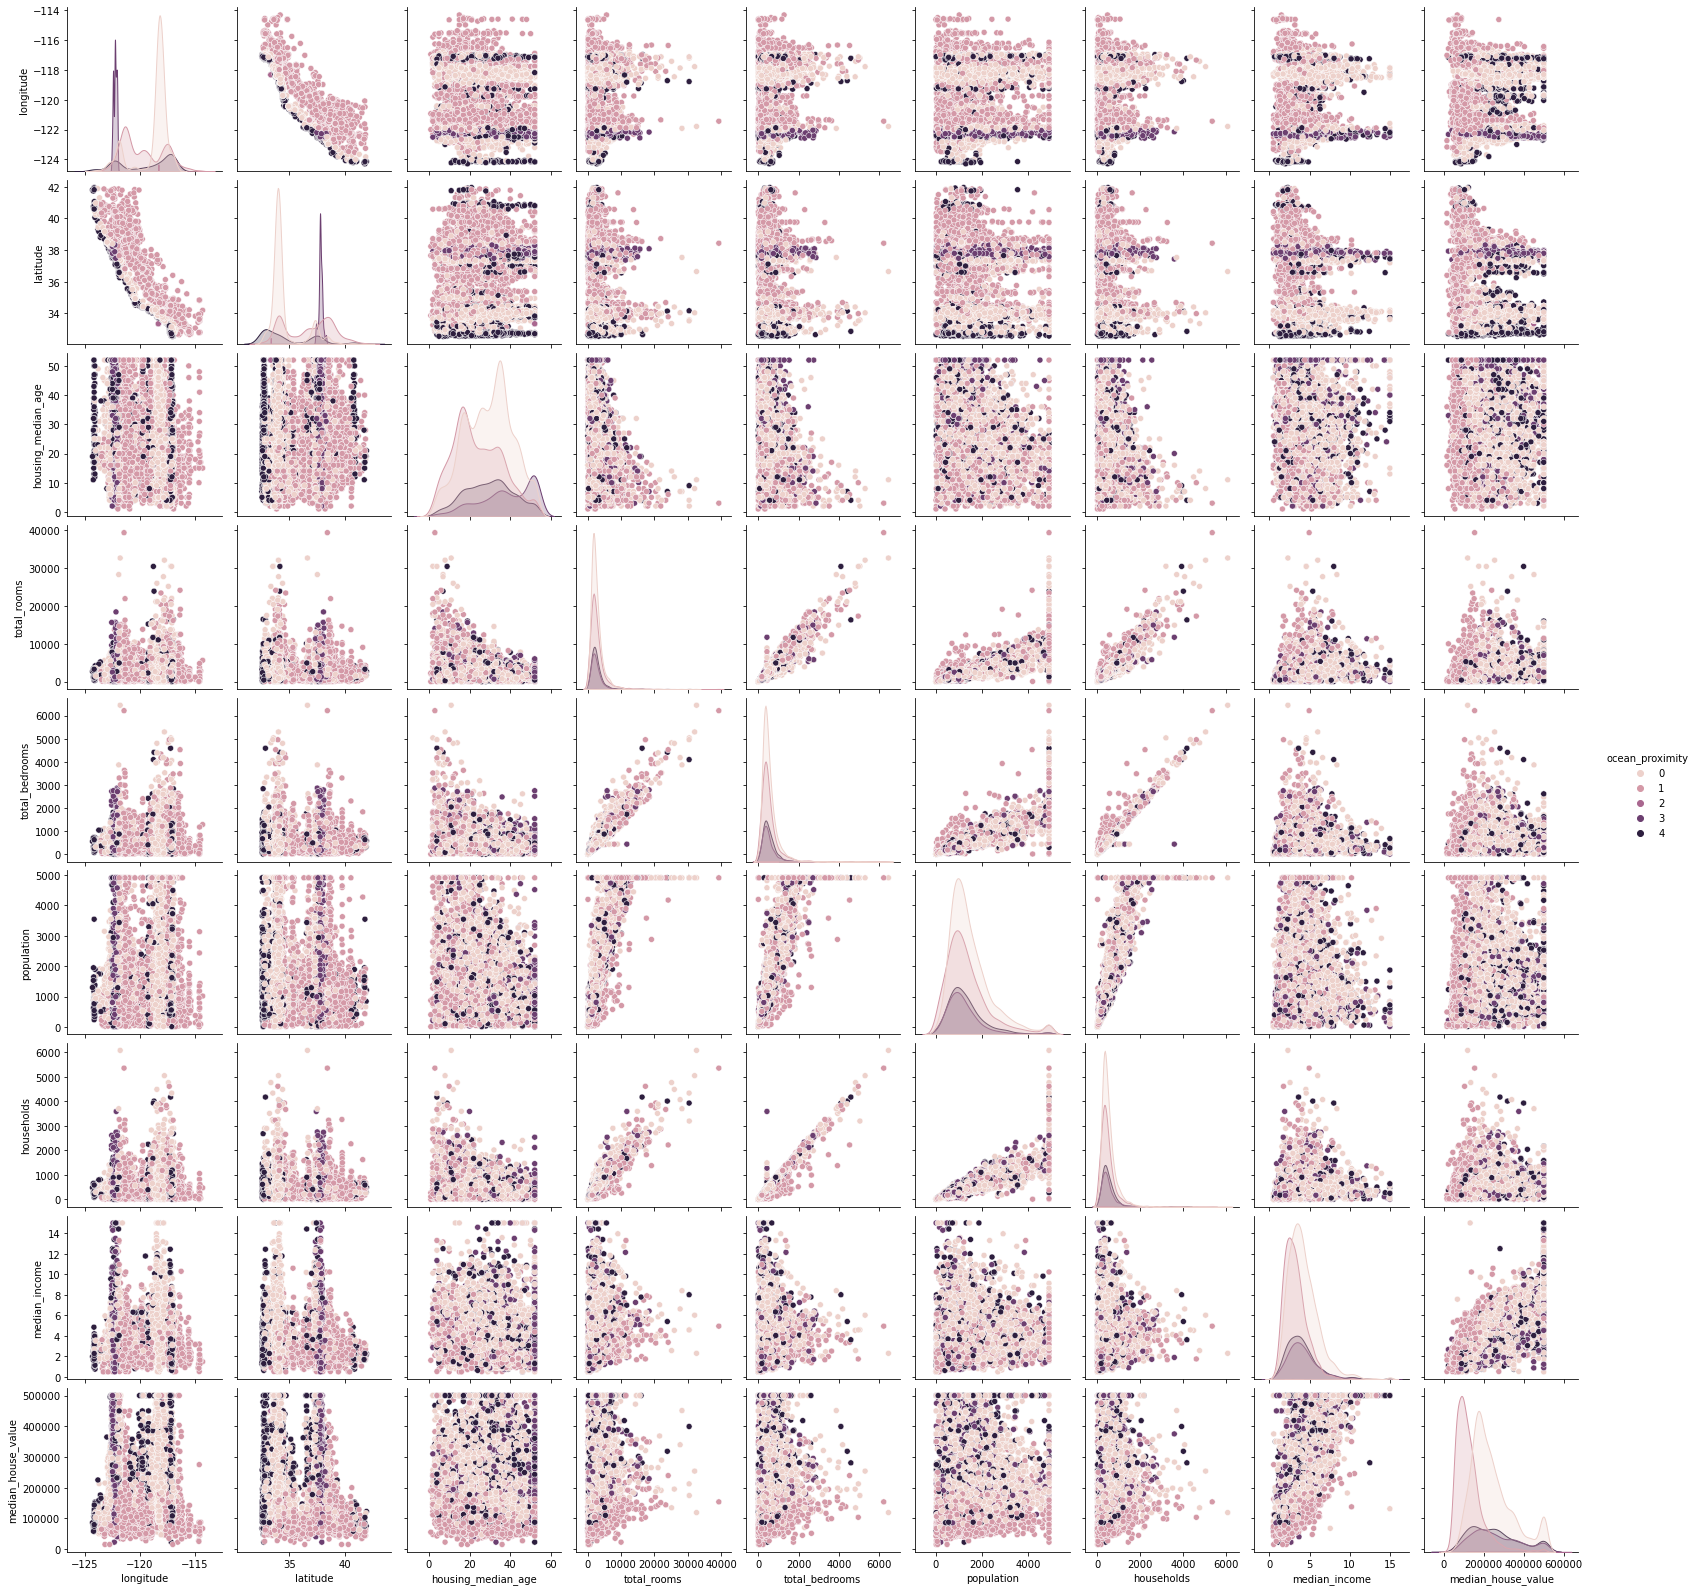

In [45]:
sns.pairplot(data=train_df,hue="ocean_proximity")

In [47]:
#on remarque que plus on se rapproche à l'ocean plus la condensation augmente et plus le mediane income augment

In [48]:
#la matrice de corrélation
corr_df = scaled_df.corr()
corr_df = scaled_df.corr(method='pearson')
corr_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
housing_median_age,1.000000,-0.364848,-0.327327,-0.319426,-0.311856,-0.106859,0.124027,-0.015855
total_rooms,-0.364848,1.000000,0.929399,0.792692,0.920102,0.205794,0.127890,-0.004620
total_bedrooms,-0.327327,0.929399,1.000000,0.831730,0.972621,0.002382,0.040473,-0.002907
population,-0.319426,0.792692,0.831730,1.000000,0.867058,0.002751,-0.037126,0.003965
households,-0.311856,0.920102,0.972621,0.867058,1.000000,0.022971,0.058147,0.000027
median_income,-0.106859,0.205794,0.002382,0.002751,0.022971,1.000000,0.692361,-0.000167
median_house_value,0.124027,0.127890,0.040473,-0.037126,0.058147,0.692361,1.000000,-0.013282
ocean_proximity,-0.015855,-0.004620,-0.002907,0.003965,0.000027,-0.000167,-0.013282,1.000000


<AxesSubplot:>

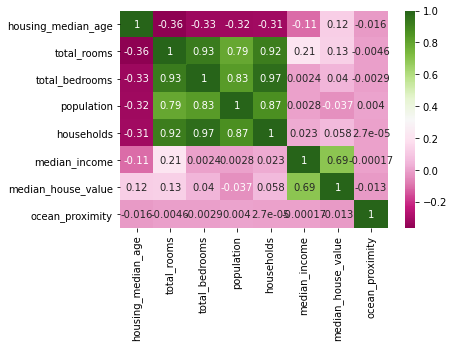

In [49]:
# correlation matrix
sns.heatmap(corr_df, annot=True, cmap="PiYG")

In [50]:
#la variable la plus corréler à la valeur "mediane house value" est la variable "median income"on peut les afficher aussi dans le graphe ci desous

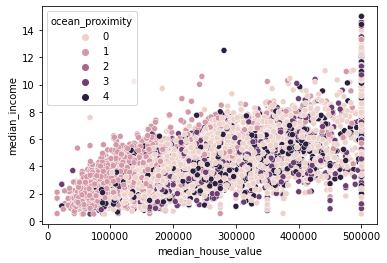

In [51]:
sns.scatterplot(x="median_house_value", y="median_income", hue="ocean_proximity",data=train_df);

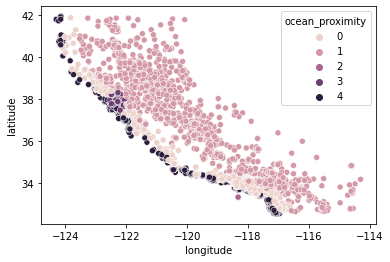

In [52]:
sns.scatterplot(x="longitude", y="latitude", hue="ocean_proximity", data=train_df);

<AxesSubplot:xlabel='median_house_value', ylabel='population'>

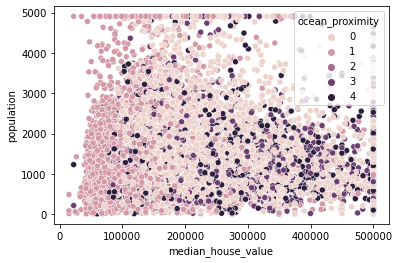

In [53]:
sns.scatterplot(x="median_house_value", y="population", hue="ocean_proximity", data=train_df)

In [54]:
#on remarque que 5000 mille presque de population on des maison de 500000dollar pendant l'année 1990, et que ces maison sont presque les plus proche à l'ocean 

In [57]:
#scaled_df.to_csv("C:/Users/Imen/Desktop/projet immobilier/scaled_df.csv", index=False)
#train_df.to_csv("C:/Users/Imen/Desktop/projet immobilier/train_df.csv", index=False)
#test_df.to_csv("C:/Users/Imen/Desktop/projet immobilier/test_df.csv", index=False)
#test_scaled_df.to_csv("C:/Users/Imen/Desktop/projet immobilier/test_scaled_df.csv", index=False)